In [1]:
# import Basic libraries

import pandas as pd
import numpy as np


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

# basic model building libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# getting the dataset

df= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
# chceking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We can observe that, or data has some null values, we have total 27 columns out of which 5 columns has all null values. Some other columns has some missing values. Our data set is mix type data set, which has both categorical and continuous columns. Let's check the dimension and null values one more time, before making any decision about the columns.

In [4]:
# checking dimension
df.shape   # tell us about number of rows and columns in our datset.


(907, 27)

In [5]:
# checking Null values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

other_fuel3, wepp_id , generation_gwh_2013 , generation_gwh_2019 ,estimated_generation_gwh are the columns with all null values, we can easily drop it. As they, doesnot provide us with any information, they are empty.
other_fuel2 consist of 906 null values, just one row has some values. we can drop other_fuel2 as well, as we cannot replace the other missing values loosing one data doesn't harm anything.

So let's drop these null values columns , and then once again check our data.

In [6]:
# dropping all null columns.
df= df.drop(columns= ['other_fuel2','other_fuel3', 'wepp_id' , 'generation_gwh_2013' ,
                      'generation_gwh_2019' ,'estimated_generation_gwh'])
df.shape

(907, 21)

In [8]:
# let's see our data one more time
df.head(6).T            # T will transpose our data columnwise, it will be easily to chcek the entire values.

,0,1,2,3,4,5
country,IND,IND,IND,IND,IND,IND
country_long,India,India,India,India,India,India
name,ACME Solar Tower,ADITYA CEMENT WORKS,AES Saurashtra Windfarms,AGARTALA GT,AKALTARA TPP,AKRIMOTA LIG
gppd_idnr,WRI1020239,WRI1019881,WRI1026669,IND0000001,IND0000002,IND0000003
capacity_mw,2.5,98.0,39.2,135.0,1800.0,250.0
latitude,28.1839,24.7663,21.9038,23.8712,21.9603,23.7689
longitude,73.2407,74.609,69.3732,91.3602,82.4091,68.6447
primary_fuel,Solar,Coal,Wind,Gas,Coal,Coal
other_fuel1,NaN,NaN,NaN,NaN,Oil,Oil
commissioning_year,2011.0,NaN,NaN,2004.0,2015.0,2005.0


We can see that country and country_long gives the same information, so we can drop it for model building. we can also observe that name and gppd_idnr are also same as one is name and other one is character identifier (kind of ID) given to the plant. we can Drop gppd_idnr as this is just identification number. We will also drop url column, as they are just the web document corresponding to the field. We are basically decluttering the dataset in order to properly analyse and build a Model.
We will drop other_fuel1 as well because it has 80% of missing columns, but before dropping it let's first check if loosing those information does not hamper our Model.

So let's drop country_long, gppd_idnr, url from our dataset.

In [9]:
# droping unwanted columns.
df= df.drop(columns=['country_long','gppd_idnr','url'])

df.shape      #checking the dimension

(907, 18)

In [12]:
# checking the unique value in other_fuel1 column
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [13]:
# chceking unique value in primary_fuel column as well
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

I think if we drop othr_fuel1 column also, it doesn't affect our model much. So let's drop the other_fuel1 column as well.

In [14]:
# dropping column other_fuel1
df=df.drop('other_fuel1', axis=1)
df.shape

(907, 17)

In [15]:
# let's check the info of dataset one more time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   name                    907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                861 non-null    float64
 4   longitude               861 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   commissioning_year      527 non-null    float64
 7   owner                   342 non-null    object 
 8   source                  907 non-null    object 
 9   geolocation_source      888 non-null    object 
 10  year_of_capacity_data   519 non-null    float64
 11  generation_gwh_2014     398 non-null    float64
 12  generation_gwh_2015     422 non-null    float64
 13  generation_gwh_2016     434 non-null    float64
 14  generation_gwh_2017     440 non-null    fl

Let's understand about the data columns of the data set.
1. Country : It represent the country code.
2. Name : name or title of the power plant, generally in Romanized form
3. capcity_mw :electrical generating capacity in megawatts
4. latitude :  geolocation in decimal degrees; WGS84 (EPSG:4326)
5. longitude :  geolocation in decimal degrees; WGS84 (EPSG:4326)
6. primary_fuel : energy source used in primary electricity generation or export
7. commissioning_year : year of plant operation, weighted by unit-capacity when data is available
8. owner :  majority shareholder of the power plant, generally in Romanized form
9. source : entity reporting the data; could be an organization, report, or document, generally in Romanized form
10. geolocation_source : attribution for geolocation information.
11. year_of_capacity_data :  year the capacity information was reported.
12. generation_gwh_2014 : electricity generation in gigawatt-hours reported for the year 2014
13. generation_gwh_2015 : electricity generation in gigawatt-hours reported for the year 2015.
14. generation_gwh_2016 : electricity generation in gigawatt-hours reported for the year 2016
15. generation_gwh_2017 : electricity generation in gigawatt-hours reported for the year 2017
16. generation_gwh_2018 : electricity generation in gigawatt-hours reported for the year 2018
17. generation_data_source : attribution for the reported generation information.


Our objective here is to predict two things : 1) primary_fuel    2) capacity_mw.

so we need to built two Models, One will be Classification model predicting primary_fuel, while other will be Regression Model predicting capacity_mw.

We also observe that our dataset consist of both categorical variables and continuous variables:
1. Categorical coulmns: 'Country', 'name', primary_fuel, 'owner', 'source', 'geolocation_source', 'generation_data_source'.
2. Numerical columns: Here also we have two types of columns: with fact values like longitude, latitude, and other like capacity_mw, comissioning_year, year of capacity, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are continuous columns.

Let's have alook at data and imputting the missing values before further analysis.

In [16]:
df.head().T

,0,1,2,3,4
country,IND,IND,IND,IND,IND
name,ACME Solar Tower,ADITYA CEMENT WORKS,AES Saurashtra Windfarms,AGARTALA GT,AKALTARA TPP
capacity_mw,2.5,98.0,39.2,135.0,1800.0
latitude,28.1839,24.7663,21.9038,23.8712,21.9603
longitude,73.2407,74.609,69.3732,91.3602,82.4091
primary_fuel,Solar,Coal,Wind,Gas,Coal
commissioning_year,2011.0,NaN,NaN,2004.0,2015.0
owner,Solar Paces,Ultratech Cement ltd,AES,NaN,NaN
source,National Renewable Energy Laboratory,Ultratech Cement ltd,CDM,Central Electricity Authority,Central Electricity Authority
geolocation_source,National Renewable Energy Laboratory,WRI,WRI,WRI,WRI


In [22]:
# statistical description
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


We can observe that 'year_of_capacity_data' consist of only one value '2019' throughout the column with some NaN values. I think we can drop this column, as this doesnot add any aditional values in our ML model building.

In [23]:
df=df.drop('year_of_capacity_data', axis =1)
df.shape

(907, 16)

# EDA

In [24]:
# missing values
df.isnull().sum()

country                     0
name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

<AxesSubplot:>

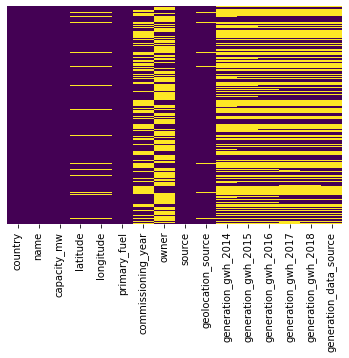

In [25]:
# Visualize it
sns.heatmap(df.isnull(),yticklabels=False , cbar= False, cmap= 'viridis')

We can observe that there are certain columns with more that 50% of missing data. let's observe other data before making any changes in the current dataset.

<AxesSubplot:xlabel='country', ylabel='count'>

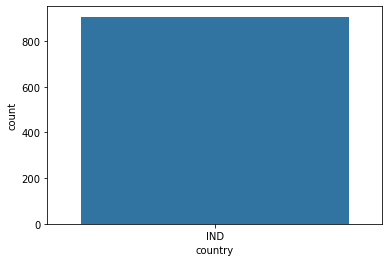

In [97]:
# Univariate Analysis

sns.countplot('country', data=df)

we can see that we are dealing wioth India data only, Now let's see how many plants do we have

In [40]:
# Let's see how many plants we have, or any name repeats in our dataset.
df['name'].value_counts()   

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Looks like we have 907 plants information with us.None of the plant name repeat in the dataset. Now let's check for fuel info.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

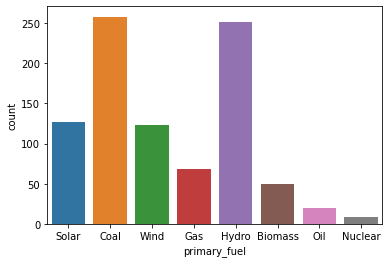

In [34]:
sns.countplot('primary_fuel', data=df, )


We can clearly see that there are 250+ count of Coal power plant and around 250 Hydro power plant.

In [37]:
# now let's check for owners
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

We can observe that we have total 280 owners, some with 4 plants some with 3 , other with 1 plant.

In [42]:
# now let's check for source
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

We can observe that Central electricity Authority consist of highest number of power plan, we have a total number of 191 source for power plant.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

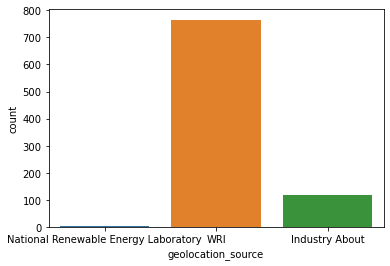

In [44]:
sns.countplot('geolocation_source', data=df)

The geolocation source of most of our data is WRI.


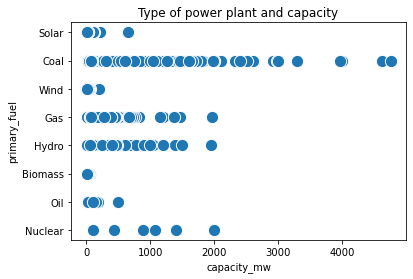

In [45]:
# Multivariate Analysis
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

The coal plants has highest power capacity plants, Nuclear plants are althought less in number but capacity is good, similarly the number of hydro power plants are comparatively very high but its energy production capacity is low.

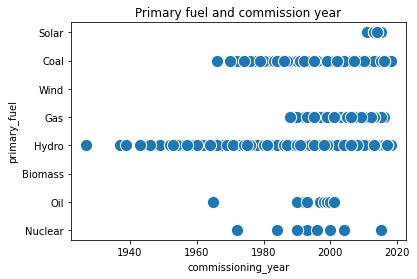

In [46]:
sns.scatterplot(x = df.commissioning_year, y = df.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

We can observe that from the beginning Hydro power plant are very popular, while solar plants come into picture very later in india. And from every 2000's oil plants popularity is also decreasing, since no new oil plant has been introduced, It might be because of obvious reason we don't find any new oil feild in india since then.

In [52]:
# correlation matrix.
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


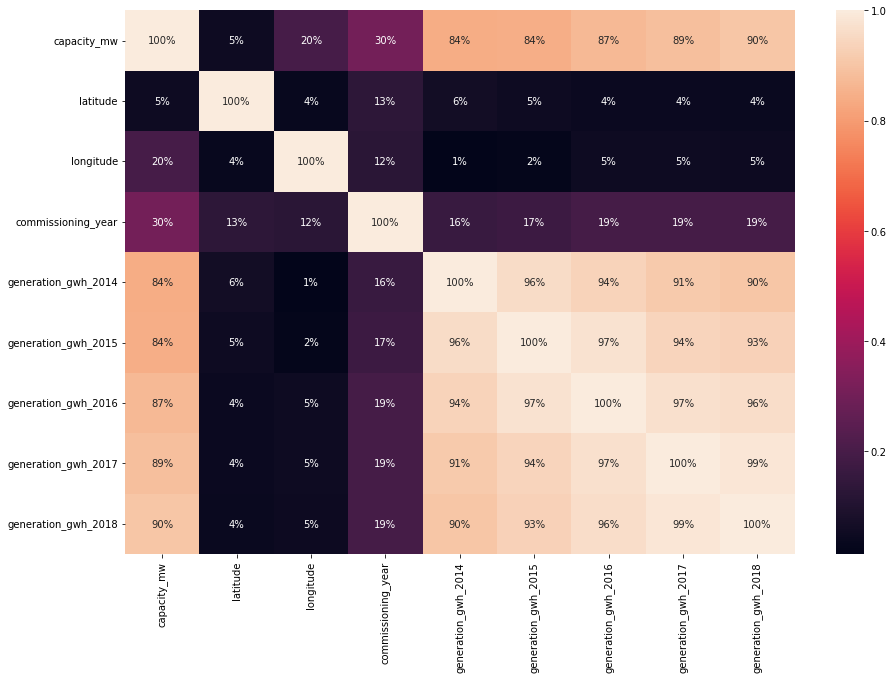

In [54]:
# Let's visualise it using HeatMap.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

We can observe that data here is strongly correlated with capacity_mw. And also we can observe that genearation_gwh2017, generation_gwh_2018 are highly correlated

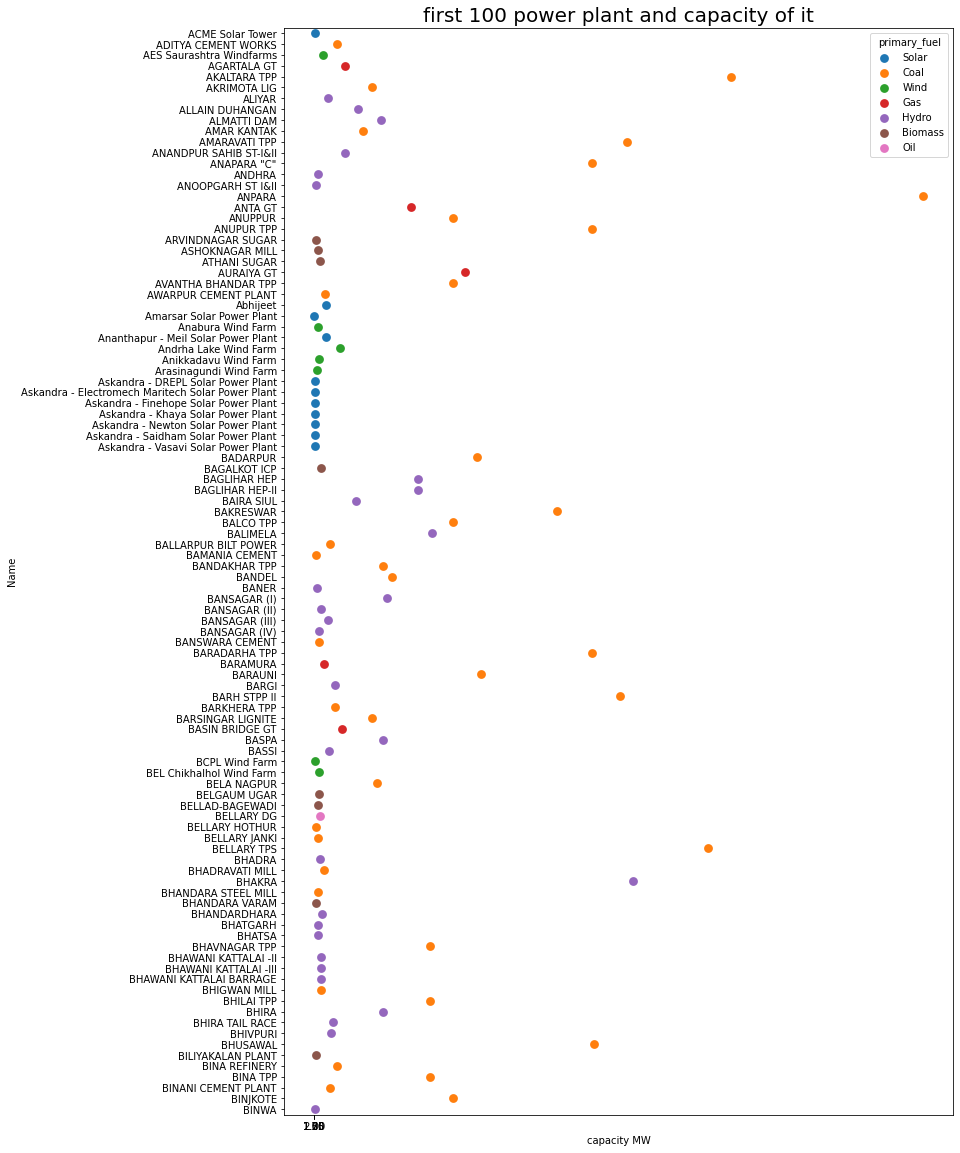

In [72]:
plt.figure(figsize=(12,20))
sns.pointplot(x='capacity_mw',y='name',data=df[:100], hue='primary_fuel',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('capacity MW')
plt.ylabel('Name')
plt.title("first 100 power plant and capacity of it",{'fontsize':20})
plt.show()

Trying to see how first 100 plants can be represented with respect to their primary fuel and power generation capacity.

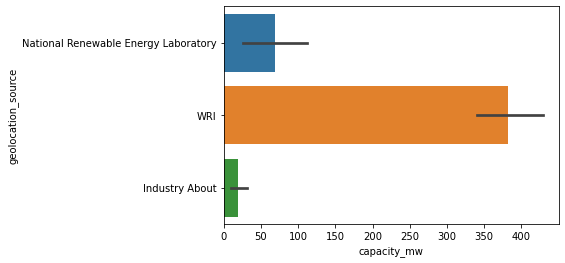

In [68]:
ax = sns.barplot(x="capacity_mw", y="geolocation_source", data=df)

Highest capacity power plants are from WRI.

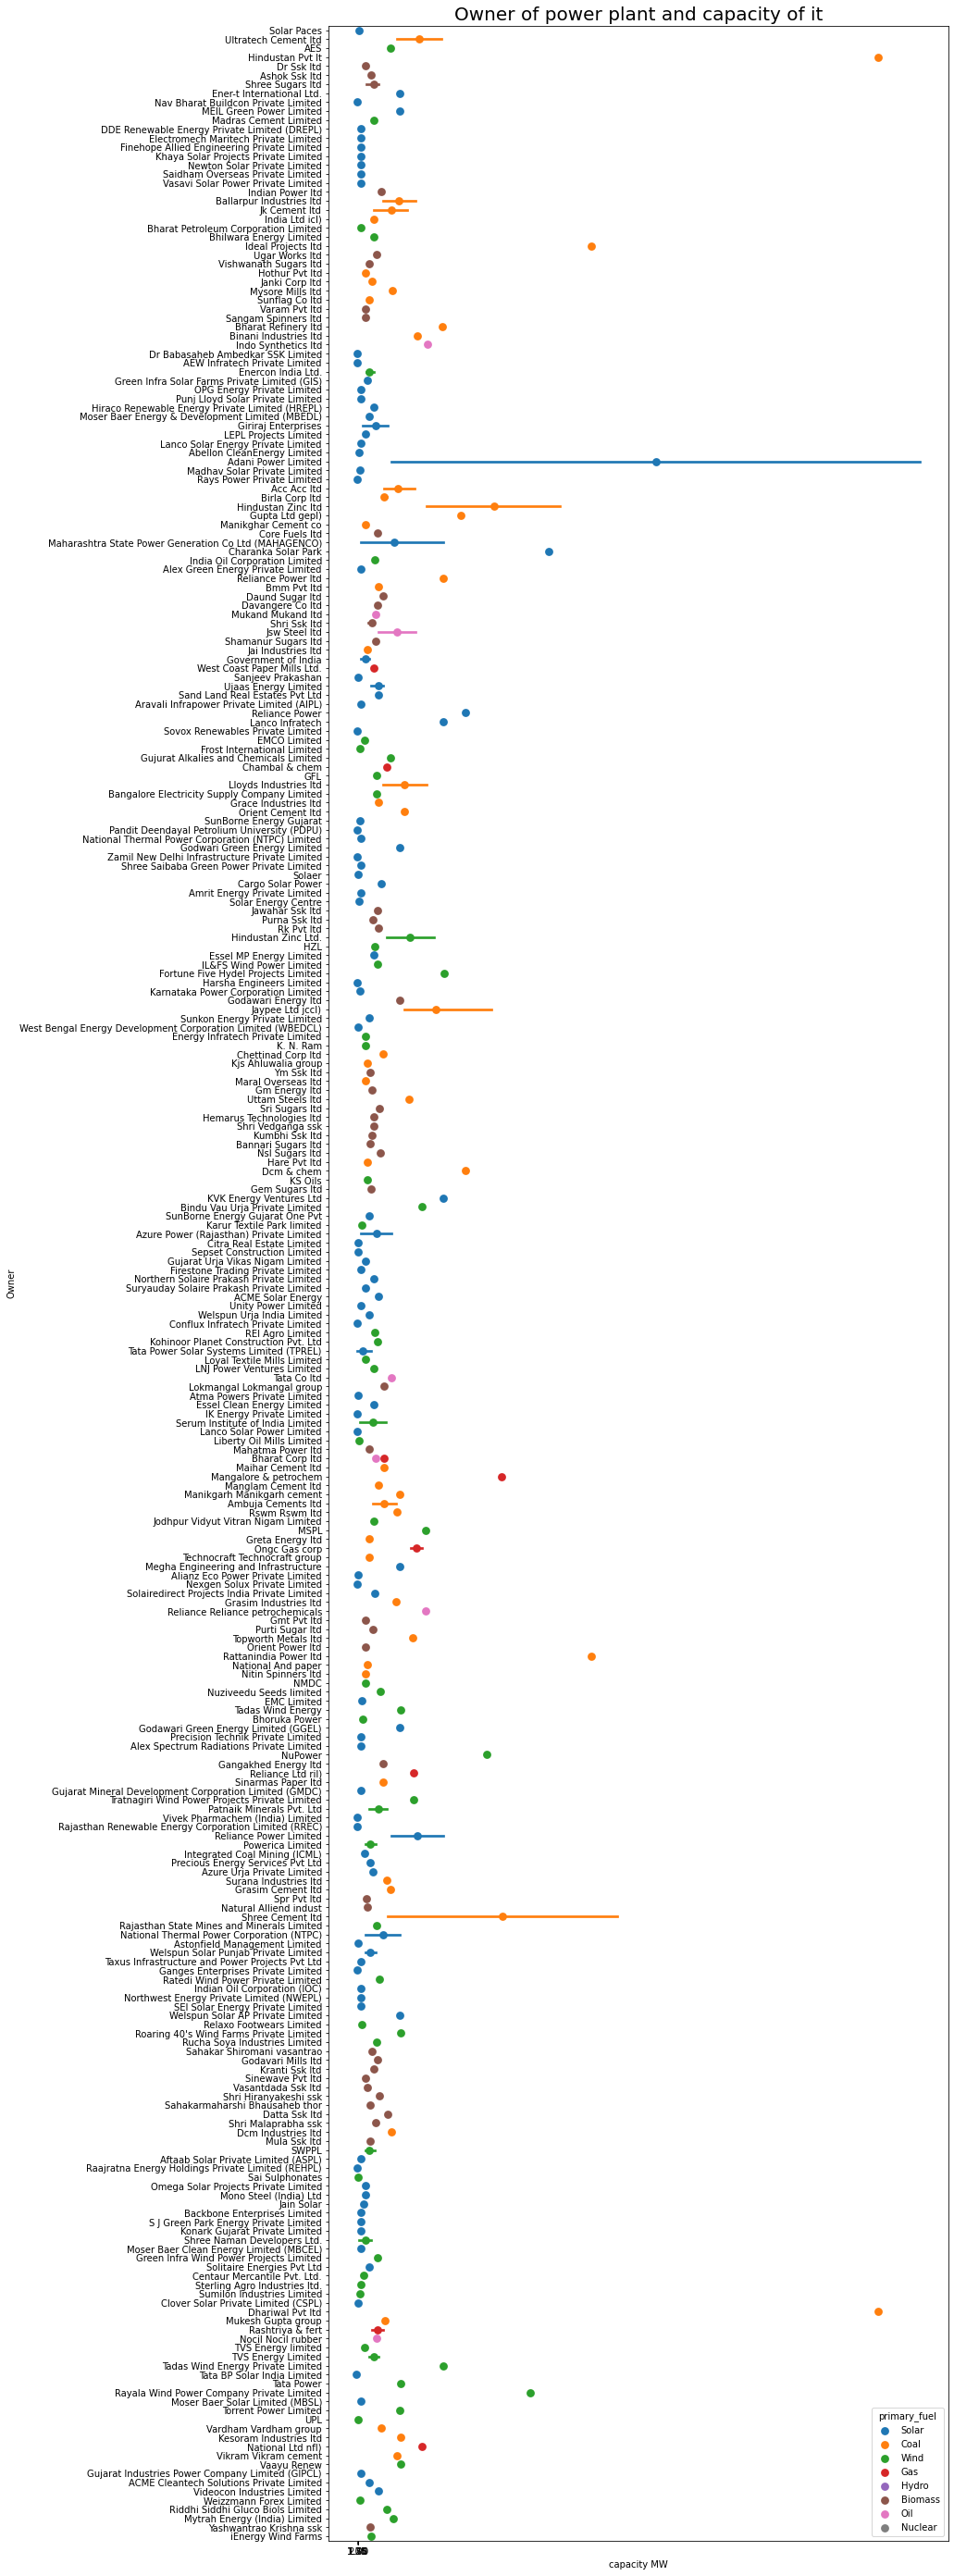

In [73]:
plt.figure(figsize=(12,50))
sns.pointplot(x='capacity_mw',y='owner',data=df, hue='primary_fuel',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('capacity MW')
plt.ylabel('Owner')
plt.title("Owner of power plant and capacity of it",{'fontsize':20})
plt.show()

We can observe thatAdani power limited solar plant has highest capacity,and also coal plants has great capacity, One thing is taken into consideration is that the 'name' column has all different values, it can be treated as identifier or index and for final model building we can drop that as well.

In [79]:
gen_gwh=df.groupby(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018', 'primary_fuel']).size().reset_index().rename(columns={0:'fuel_type count'})

In [84]:
gen_gwh

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel,fuel_type count
0,0.0,0.0,0.00000,0.0000,0.000000,Coal,4
1,0.0,0.0,0.00000,0.0000,0.000000,Gas,3
2,0.0,0.0,0.00000,0.0000,0.000000,Oil,4
3,0.0,0.0,0.00000,72.8250,135.491000,Coal,1
4,0.0,0.0,120.90364,34.7098,40.150617,Coal,1
...,...,...,...,...,...,...,...
378,20603.0,21078.0,22522.00000,21771.0000,22625.000000,Coal,1
379,22215.0,22480.0,21370.00000,21490.0000,19850.000000,Coal,1
380,24501.0,23679.0,25303.00000,24599.0000,24752.000000,Coal,1
381,27594.0,29047.0,30015.00000,35116.0000,35136.000000,Coal,1


Using groupby function group all the features with generation_gwh for 2014, 2015, 2016, 2017, 2018 and primary_fuel to show there relation with primary_fuel

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

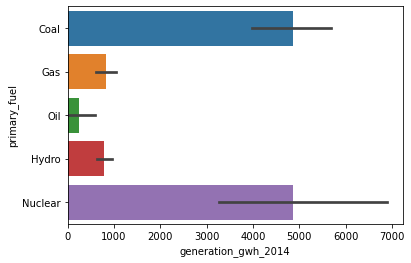

In [87]:
sns.barplot(x='generation_gwh_2014',y='primary_fuel',data=gen_gwh)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

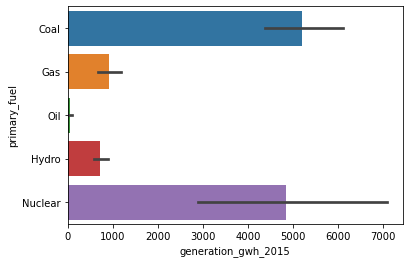

In [88]:
sns.barplot(x='generation_gwh_2015',y='primary_fuel',data=gen_gwh)

the generation of power using oil is decreases as compared to previous year i.e 2014

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

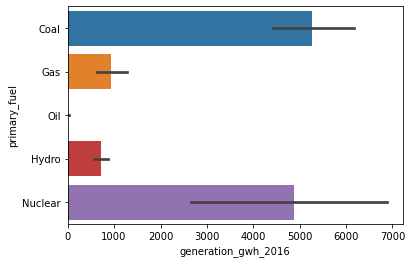

In [89]:
sns.barplot(x='generation_gwh_2016',y='primary_fuel',data=gen_gwh)

The generation of power using oil as fuel is further decreases here

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

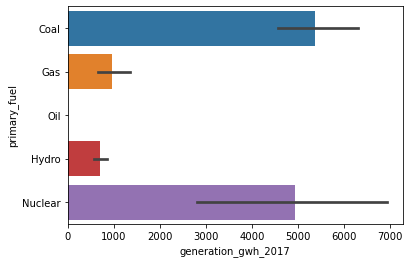

In [90]:
sns.barplot(x='generation_gwh_2017',y='primary_fuel',data=gen_gwh)

From 2017 onwards we didnot get any power generation using oil as fuel, it might have been using as other fuel but definitely not as primary fuel.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='primary_fuel'>

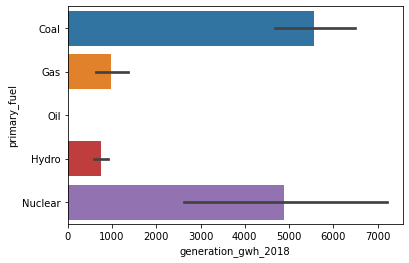

In [91]:
sns.barplot(x='generation_gwh_2018',y='primary_fuel',data=gen_gwh)

We are generating almost similar power as in previous years Coal and nuclear power production are high while oil power plants don't show any production. generation_gwh_2017 and generation_gwh_2018 seems alot similar here.

In [92]:
# let's chcek our columns once again.
df.columns

Index(['country', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [93]:
df.dtypes

country                    object
name                       object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

As we already observe above that Country has only one value 'IND' throughout the column, we can say that it won't add any additional value in our ML Model Building, so we can drop it. Secondly name column is basically different name provided to the plant

In [96]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

We can see that, it has only two values, first is nan and the other one os Central electricity Authority. If in this case we need to impute the data here, it will iterate the Nan values with Central Electricity Authority it self. And the entire column again became single value column. And finally we will drop it during ML model building.

In [181]:
# copying the entire dataframe and then drop the columns from new dataframe.
df1=df.copy()
df1=df1.drop(columns=['name','country','generation_data_source'])


In [99]:
df1.head()             # checking the data one more time

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [103]:
df1.columns   #  listing the columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [ ]:
# using group by function to make some observation
df1.groupby(['latitude', 'longitude', 'primary_fuel']).size()

From here wecan simply observe that they are geosaptical location of the plant, this is import feature in files but not of much using in ML model building, so we will drop these as well.

In [182]:
# dropping latitude and longitude.
df1=df1.drop(columns=['latitude','longitude'], axis=1)
df1.shape

(907, 11)

# Imputating categorical data

In [183]:
# filling missing values
df1['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [184]:
# let's use mode to fill this discrete value
df1['commissioning_year']= df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [185]:
df1['commissioning_year'].isnull().sum()

0

In [186]:
df1.isnull().sum()    # chceking all the null values present in the dataset one more time

capacity_mw              0
primary_fuel             0
commissioning_year       0
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [187]:
df1['geolocation_source'].unique()           # Looking at all the values for geolocation_source

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [188]:
# replacing value for geolocation_source
df1['geolocation_source']=df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0])
df1['geolocation_source'].isnull().sum()

0

In [189]:
# replacing missing value for owner
df1['owner']=df1['owner'].fillna('T')  # filling with new category 'T'

In [190]:
df1['owner'].isnull().sum()   # checking if imputation is done correctly or not.

0

For rest of the numerical data columns we will impute missing value using KNN imputer. But before that let's convert categorical columns to numerical 

# Encoding 

we will use Label encoder to encode the categorical columns to numerical  

In [191]:
# will use Label encoder to encode the values.
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()
df1['primary_fuel']=lab_enc.fit_transform(df1['primary_fuel'])
df1['owner']=lab_enc.fit_transform(df1['owner'])
df1['geolocation_source']=lab_enc.fit_transform(df1['geolocation_source'])


In [139]:
df1['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [192]:
# encoding source using label encoder
df1['source']=lab_enc.fit_transform(df1['source'])

In [193]:
# let's chcek the datatype ones
df1.dtypes

capacity_mw            float64
primary_fuel             int32
commissioning_year     float64
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

Data looks good, let's go ahead, with scaling before imputing the remaining data using knn.


# Scaling

We are using MinMaxScaler here to scale our dataset.

In [194]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_c=df1            #copying the data

df1 = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

df1.head()

,capacity_mw,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.000525,0.857143,0.923077,0.817857,0.573684,0.5,NaN,NaN,NaN,NaN,NaN
1,0.020588,0.142857,0.967033,0.925000,0.915789,1.0,NaN,NaN,NaN,NaN,NaN
2,0.008235,1.000000,0.967033,0.007143,0.110526,1.0,NaN,NaN,NaN,NaN,NaN
3,0.028361,0.285714,0.846154,0.864286,0.115789,1.0,0.021964,0.027629,0.029519,0.018902,0.017823
4,0.378151,0.142857,0.967033,0.864286,0.115789,1.0,0.107923,0.193732,0.207996,0.153365,0.207166


Data looks good so far, now we need to remove the remaining NaN values for that we will use KNN imputer, we already did scale our dataset, which is a pre requisite to perform KNN imputation


# Imputating using KNN imputer

In [195]:
#knn imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df1= pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

df1.isnull().sum()


capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Our dataset looks good now, with no null values, we already scaled our dataset using MInMaxScaler.

Now let's once check the correlation matrix before moving ahead for Model building. 

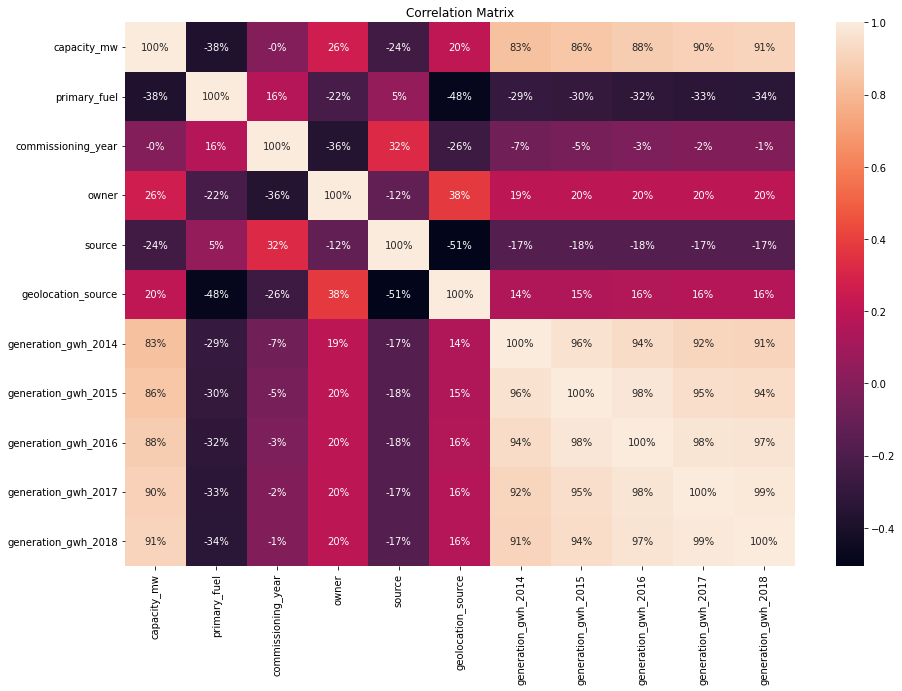

In [239]:
# using heatmap for correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot= True, fmt='.0%')
plt.title ("Correlation Matrix")
plt.show()

From here we can observe that , commissioning_year is not at all correlated with Capacity_mw, so when we predict for capacity_mw we can drop this column.


As we know that from this dataset we need to do two predictions:
1. Predicting primary_fuel:- In this case our Model will be a Multiclass classification model. Where label will be 'primary_fuel' and rest other are features.


2. Predicting capacity_mw :- this will be our regression model, where we will predict the capacity_mw of the power plant.


So moving forward we will prepare two data set , one for classification and other for regression ML model.

# Preparing dataset for two different models.

# 1. Regression Model

In [146]:
# spliting labels and features
# since our label here is capacity_mw, we will drop commissioning_year as well from our features.

X_reg= df1.drop(columns=['capacity_mw','commissioning_year'], axis=1)
y_reg=df1.capacity_mw

In [147]:
# chceking for dimension befor spliting them into train and test data
print(X_reg.shape)
print(y_reg.shape)

(907, 9)
(907,)


In [148]:
# spliting them into train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_reg,y_reg, test_size=0.25)

# Model Building (Regression)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ML Model
LR= LinearRegression()

#fit
LR.fit(X_train,Y_train)

#predict
Y_pred= LR.predict(X_test)
pred=LR.predict(X_train)

print("--------- Train score---------")
LR_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
LR_train_MSE= round(mean_squared_error(Y_train, pred), 2)
LR_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {LR_train_MAE}\n")
print(f" Mean Squared Error : {LR_train_MSE}\n")
print(f" R^2 Score : {LR_train_R2}\n")


#score variables
LR_MAE= round(mean_absolute_error(Y_test, Y_pred), 2)
LR_MSE= round(mean_squared_error(Y_test, Y_pred), 2)
LR_R2= round(r2_score(Y_test, Y_pred), 4)

print("---------------Test Score-------------")
print(f" Mean Absolute Error : {LR_MAE}\n")
print(f" Mean Squared Error : {LR_MSE}\n")
print(f" R^2 Score : {LR_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.03

 Mean Squared Error : 0.0

 R^2 Score : 0.8433

---------------Test Score-------------
 Mean Absolute Error : 0.03

 Mean Squared Error : 0.0

 R^2 Score : 0.8392



In [151]:
# cross validation
from sklearn.model_selection import cross_val_score
LR= LinearRegression()
scores= cross_val_score(LR, X_train, Y_train, scoring='r2', cv=10)
LR_CS=scores.mean()
print("Cross validation score is : ", LR_CS)

Cross validation score is :  0.8063133696495518


# Ensemble Technique

In [152]:
from sklearn.ensemble import RandomForestRegressor

#Model
RFR= RandomForestRegressor()

#fit 
RFR.fit(X_train, Y_train)

#predict
Y_pred=RFR.predict(X_test)
pred=RFR.predict(X_train)

#score variables
print("--------- Train score---------")
RF_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
RF_train_MSE= round(mean_squared_error(Y_train, pred), 2)
RF_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {RF_train_MAE}\n")
print(f" Mean Squared Error : {RF_train_MSE}\n")
print(f" R^2 Score : {RF_train_R2}\n")

print("--------- Test score---------")
RFR_MAE= round(mean_absolute_error(Y_test, Y_pred), 2)
RFR_MSE= round(mean_squared_error(Y_test, Y_pred), 2)
RFR_R2= round(r2_score(Y_test, Y_pred), 4)


print(f" Mean Absolute Error : {RFR_MAE}\n")
print(f" Mean Squared Error : {RFR_MSE}\n")
print(f" R^2 Score : {RFR_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.01

 Mean Squared Error : 0.0

 R^2 Score : 0.9846

--------- Test score---------
 Mean Absolute Error : 0.02

 Mean Squared Error : 0.0

 R^2 Score : 0.8755



In [153]:
# Cross Validation
scores= cross_val_score(RFR, X_train, Y_train, scoring='r2', cv=10)
RFR_CS=scores.mean()
print("Cross validation score is : ", RFR_CS)

Cross validation score is :  0.8717574035629372


# Boosting

In [154]:
import xgboost as xgb

#Model
xgb= xgb.XGBRegressor()

#fit 
xgb.fit(X_train, Y_train)

#predict
Y_pred=xgb.predict(X_test)
pred=xgb.predict(X_train)

#score variables
print("--------- Train score---------")
xgb_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
xgb_train_MSE= round(mean_squared_error(Y_train, pred), 2)
xgb_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {xgb_train_MAE}\n")
print(f" Mean Squared Error : {xgb_train_MSE}\n")
print(f" R^2 Score : {xgb_train_R2}\n")

print("--------- Test score---------")
xgb_MAE= round(mean_absolute_error(Y_test, Y_pred), 2)
xgb_MSE= round(mean_squared_error(Y_test, Y_pred), 2)
xgb_R2= round(r2_score(Y_test, Y_pred), 4)


print(f" Mean Absolute Error : {xgb_MAE}\n")
print(f" Mean Squared Error : {xgb_MSE}\n")
print(f" R^2 Score : {xgb_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.0

 Mean Squared Error : 0.0

 R^2 Score : 0.9994

--------- Test score---------
 Mean Absolute Error : 0.02

 Mean Squared Error : 0.0

 R^2 Score : 0.8416



In [155]:
# cross validation
scores= cross_val_score(xgb, X_train, Y_train, scoring='r2', cv=10)
xgb_CS=scores.mean()
print("Cross validation score is : ", xgb_CS)

Cross validation score is :  0.8358057364259551


In [157]:
# let's summarize each models to make final decision and perform hyper parameter tuning 

MAE=[LR_MAE,RFR_MAE,xgb_MAE]
MSE=[LR_MSE,RFR_MSE,xgb_MSE]
R2= [LR_R2,RFR_R2,xgb_R2]
Cross_score= [LR_CS,RFR_CS,xgb_CS]

Model= pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor', 'XGBRegressor'],
    'MAE': MAE, 'MSE' :MSE, 'R^2' :R2, 'Cross Validation Score': Cross_score })

Model.sort_values(by ='MAE', ascending = True )


,Models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,0.02,0.0,0.8755,0.871757
2,XGBRegressor,0.02,0.0,0.8416,0.835806
0,Linear Regression,0.03,0.0,0.8392,0.806313


From here we can observe that RandomForestRegressor performs better out of three models. We got minimum value for Mean absolute error , our mean squared error is zero and also we get decent value of R2 score. Now let's hyperparameter tune our randomforest model in order to increase its efficiency.

In [158]:
# Hyper parameter tuning for RandomForestRegressor model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

RFR= RandomForestRegressor()

#determining what algorithm and parameter works better.
param_grid= {'n_estimators': [50,80,100],
            'criterion': ['squared_error', 'absolute_error','poisson'],
             'max_depth': [4,9,13],
             'min_samples_leaf':[1,2,6,8],
            'n_jobs': [1,4,10]}

#rnd_srch=RandomizedSearchCV(RandomForestRegressor(), cv=5, param_distributions= param_grid)

#rnd_srch.fit(x_train,y_train)


#rnd_srch.best_estimator_

grid_search=GridSearchCV(estimator=RFR, param_grid= param_grid, cv=5)

grid_search.fit(X_train,Y_train)

grid_search.best_estimator_


RandomForestRegressor(criterion='absolute_error', max_depth=9, n_estimators=50,
                      n_jobs=1)

In [161]:
GCV_pred= grid_search.best_estimator_.predict(X_test)   # predicting with best para meters
print("Accuracy post tuning \n")
print(r2_score(Y_test, GCV_pred))

Accuracy post tuning 

0.8837887614476544


We use GridsearchCV to hypertune our model, and are able to increase the score to 88.37%. As our Regression model is build, cross validate and hypertuned, its time to save our final RandomForest regressor model.

# Regression model saving

In [162]:
# Saving Best Performing Model
import joblib
joblib.dump(RFR, "Global_plant_database_predict_capacity.pkl")

['Global_plant_database_predict_capacity.pkl']

# 2.  Multiclass classification problem

In this dataset we will include every feature, and our label will be primary_fuel. 

In [196]:
# for classification model, we don't want to scaled primary_fuel, so let's replace primary_fuel with original 
df1['primary_fuel']=df_c['primary_fuel']
df1.head()


,capacity_mw,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.000525,6,0.923077,0.817857,0.573684,0.5,0.005538,0.000846,0.000126,0.000000,0.000000
1,0.020588,1,0.967033,0.925000,0.915789,1.0,0.004029,0.002390,0.003824,0.007975,0.009259
2,0.008235,7,0.967033,0.007143,0.110526,1.0,0.005538,0.000846,0.000126,0.000000,0.000000
3,0.028361,2,0.846154,0.864286,0.115789,1.0,0.021964,0.027629,0.029519,0.018902,0.017823
4,0.378151,1,0.967033,0.864286,0.115789,1.0,0.107923,0.193732,0.207996,0.153365,0.207166


In [197]:
# Now let's split our data into feature and label
X_clas=df1.drop('primary_fuel', axis=1)
y_clas=df1.primary_fuel

# chceking dimension
print(X_clas.shape)
print(y_clas.shape)

(907, 10)
(907,)


# Model Building (Classification)


Let's start with splitting our dataset into train and test set, we are taking 25% data as test and 75% data as training data.

All the necessary libraries and metrics will be imported as required inside the model it self.

In [198]:
# spliting into train test data
x_train,x_test,y_train,y_test=train_test_split(X_clas,y_clas,test_size=0.25)



# Logistic Regression

In [209]:
# import necessary library
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

#Model 
lr=LogisticRegression()

maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(X_clas,y_clas,test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)   #fitting the data will train your model
    y_pred=lr.predict(x_test)    # this is predicted target variable
    acc= f1_score(y_test,y_pred,average='weighted')   # weighted f1 score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)
    
print("Best f1 score is ", maxAccu, "at random state ", maxRS)

Accuracy  0.5997049806861455 Random state  1
Max accuracy  0.5997049806861455  at random state  1
Accuracy  0.6603887085275179 Random state  2
Max accuracy  0.6603887085275179  at random state  2
Accuracy  0.7231947390063124 Random state  3
Max accuracy  0.7231947390063124  at random state  3
Accuracy  0.6870329367070974 Random state  4
Accuracy  0.6918418246374494 Random state  5
Accuracy  0.644648993869202 Random state  6
Accuracy  0.6598856856234202 Random state  7
Accuracy  0.7047471371890889 Random state  8
Accuracy  0.6739122920694957 Random state  9
Accuracy  0.6743981993176055 Random state  10
Accuracy  0.6781164064127948 Random state  11
Accuracy  0.6465758726955789 Random state  12
Accuracy  0.6509434276077177 Random state  13
Accuracy  0.6959816158371985 Random state  14
Accuracy  0.7138214321907326 Random state  15
Accuracy  0.635700052354729 Random state  16
Accuracy  0.6465785609397945 Random state  17
Accuracy  0.6965005711989047 Random state  18
Accuracy  0.660684463826

Accuracy  0.6350070866157468 Random state  174
Accuracy  0.7590098216524455 Random state  175
Max accuracy  0.7590098216524455  at random state  175
Accuracy  0.683542764206037 Random state  176
Accuracy  0.6535788643225094 Random state  177
Accuracy  0.6666303671987555 Random state  178
Accuracy  0.6095097806765972 Random state  179
Accuracy  0.6094527505755863 Random state  180
Accuracy  0.6632448748388647 Random state  181
Accuracy  0.6796716251941044 Random state  182
Accuracy  0.6908863498649963 Random state  183
Accuracy  0.6763965912178665 Random state  184
Accuracy  0.6897531418319134 Random state  185
Accuracy  0.6524678241340588 Random state  186
Accuracy  0.6629343881348377 Random state  187
Accuracy  0.6836806598363899 Random state  188
Accuracy  0.6482478900146013 Random state  189
Accuracy  0.6738073222651385 Random state  190
Accuracy  0.6956394253483479 Random state  191
Accuracy  0.7042354084167737 Random state  192
Accuracy  0.6606714774698116 Random state  193
Accura

In [210]:
# creating train test split for best random state
x_train,x_test,y_train,y_test= train_test_split(X_clas,y_clas,test_size=0.25, random_state=175)

pred=lr.predict(x_train)
lr_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))
y_Pred_prob=lr.predict_proba(x_test) # test probability
Pred_prob= lr.predict_proba(x_train)  # train probabilty


# scoring variables
lr_score= (f1_score(y_test, y_Pred, average= 'weighted')).mean()          # f1_score for test data
lr_train_score= (f1_score(y_train,Pred, average= 'weighted')).mean()       # f1_score for train data
lr_train_roc_auc= roc_auc_score(y_train, Pred_prob, multi_class="ovr")  # roc auc for train data
lr_roc_auc= roc_auc_score(y_test, y_Pred_prob, multi_class="ovr")    # roc auc for test data

print("=====================Train Result========================")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {lr_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f" f-1 Score for train data : {lr_train_score}\n")
print("--------------------------------------------------------------\n")
print("\n")
print(f" ROC_AUC score for train data : {lr_train_roc_auc}\n")

# Test score

y_pred=lr.predict(x_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("=====================Test Result========================")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------\n")
print(f" f-1 Score for test data : {lr_score}\n")
print("-----------------------------------------------------------\n")

print(f" ROC_AUC score for test data: {lr_roc_auc}\n")


=====================Train Result========================
Confusion Matrix : 
 [[  7  32   0   0   0   0   0   2]
 [  8 133   0  33   0   0   0  19]
 [  1  15   0  34   0   0   0   4]
 [  0  15   0 154   0   0   0  14]
 [  0   3   0   4   0   0   0   0]
 [  1   4   0   9   0   0   0   0]
 [  1   2   0   0   0   0  90   0]
 [  0   0   0   2   0   0   0  93]]



---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0           1     2           3    4     5          6  \
precision   0.388889    0.651961   0.0    0.652542  0.0   0.0   1.000000   
recall      0.170732    0.689119   0.0    0.841530  0.0   0.0   0.967742   
f1-score    0.237288    0.670025   0.0    0.735084  0.0   0.0   0.983607   
support    41.000000  193.000000  54.0  183.000000  7.0  14.0  93.000000   

                   7  accuracy   macro avg  weighted avg  
precision   0.704545  0.701471    0.424742      0.619294  
recall      0.978947  0.701471    0.456009      0

In [218]:
# cross validation
from sklearn.model_selection import cross_val_score

# validating accuracy
lr_scr= (cross_val_score(lr, X_clas, y_clas,scoring='roc_auc_ovr', cv=5)).mean()
print("Cross Validation Score For Logistic Regression model : ", lr_scr)

Cross Validation Score For Logistic Regression model :  0.8442362313287843


From above we can observe that our model gives us decent F1 score and roc_auc _score as well, we plot classification report just to see how our model is performing for individual class, we can clearly see the precision and recallvalues for each class of our label.

Confusion matrix gives us idea about the true positive -true negative -false positive -false negative in our model. Which in return helps us to see the result in the form or precision and recall. 

Here we take F1 score as our one of the deciding matrix , as we already observed the imbalance in the classes of label.
so it helps us to decide how accurately our model is predicting various classes of the label.




# KNN Classifier

In [221]:
from sklearn.neighbors import KNeighborsClassifier

# Model
KNN= KNeighborsClassifier()

#fit
KNN.fit(x_train,y_train)

#predict
knn_clf_report= classification_report(y_train,Pred)
y_Pred= KNN.predict(x_test)   #predicting for test data
Pred=KNN.predict(x_train)     # predicting for train data.
y_Pred_prob=KNN.predict_proba(x_test) # test probability
Pred_prob= KNN.predict_proba(x_train)  # train probabilty

# scoring variables
KNN_score= (f1_score(y_test, y_Pred, average= 'weighted')).mean()          # f1_score for test data
KNN_train_score= (f1_score(y_train,Pred, average= 'weighted')).mean()       # f1_score for train data
KNN_train_roc_auc= roc_auc_score(y_train, Pred_prob, multi_class="ovr")  # roc auc for train data
KNN_roc_auc= roc_auc_score(y_test, y_Pred_prob, multi_class="ovr")
                            # we are using one vs rest method under multiclass parameter to calculate roc_auc_acore
print("\n=========================Train Score======================================\n")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, Pred)}\n")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {knn_clf_report}")
print("\n-------------------------------------------------------------\n")
print(f" f-1 Score for train data : {KNN_train_score}\n")
print("\n----------------------------------------------------------------\n")
print(f" ROC_AUC score for train data : {KNN_train_roc_auc}\n")


clf_report=classification_report(y_test,y_Pred)
print("\n===========================Test Score======================================\n")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_Pred)}\n")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("------------------------------------------------------------------\n")
print(f" f-1 Score for test data : {KNN_score}\n")
print("\n--------------------------------------------------------------\n")
print(f" ROC_AUC score for test data: {KNN_roc_auc}\n")



=========================Train Score======================================

Confusion Matrix : 
 [[ 29  12   0   0   0   0   0   0]
 [ 15 161   1  14   0   0   0   2]
 [  5  16  25   8   0   0   0   0]
 [  0  16   5 162   0   0   0   0]
 [  0   6   0   1   0   0   0   0]
 [  2   2   3   7   0   0   0   0]
 [  0   3   1   0   0   0  89   0]
 [  0   0   0   0   0   0   0  95]]



---------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.57      0.71      0.63        41
           1       0.75      0.83      0.79       193
           2       0.71      0.46      0.56        54
           3       0.84      0.89      0.86       183
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14
           6       1.00      0.96      0.98        93
           7       0.98      1.00      0.99        95

    accuracy                           0.

In [227]:
# Cross validation
KNN_scr= (cross_val_score(KNN, X_clas, y_clas,scoring='roc_auc_ovr', cv=5)).mean()
print("Cross Validation Score For KNeighbours calssifier model : ", KNN_scr)

Cross Validation Score For KNeighbours calssifier model :  0.8634920006351218


Our model gives decent values for f1 score and roc auc score, cross validation also looks good, looks like we are on the right path.
Next we will do a boosting model, gradient boost classifier will be good fit I suppose.


# Boosting

In [225]:
# Model
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()

#fit
GBC.fit(x_train, y_train)

# predict
Y_Pred= GBC.predict(x_test)            # predicting for test data.
Pred=GBC.predict(x_train)             #predicting for train data

Y_Pred_prob= GBC.predict_proba(x_test)  #test probability
Pred_prob= GBC.predict_proba(x_train)    # train data probability
GBC_clf_report=classification_report(y_train,Pred)   #classification report for train data
clf_report=classification_report(y_test,Y_Pred)
#score variables
GBC_score= (f1_score(y_test, Y_Pred, average= 'weighted')).mean()
GBC_train_score= (f1_score(y_train, Pred, average= 'weighted')).mean()
GBC_train_roc_auc= roc_auc_score(y_train, Pred_prob, multi_class="ovr")
GBC_roc_auc=roc_auc_score(y_test,Y_Pred_prob, multi_class="ovr")   
                           # we are using multiclass= "ovr" that means one over rest method

print("\n===============================Train Score=======================================")
print(f" Confusion Matrix : \n {confusion_matrix(y_train,Pred)}\n")
print("\n-----------------------------------------------------------------\n")
print(" Classification report for train data : \n", GBC_clf_report)
print("\n------------------------------------------------------------------\n")
print(f" f-1 Score for train data : {GBC_train_score}\n")
print("\n-------------------------------------------------------------------\n")
print(f"ROC_AUC score for train data : {GBC_train_roc_auc}\n")
print("\n ===============================Test score========================================\n")
print(f" Confusion Matrix : \n {confusion_matrix(y_test, Y_Pred)}\n")
print("\n-----------------------------------------------------------------\n")
print("Classification report :\n", clf_report)
print("\n-----------------------------------------------------------------\n")
print(f" f-1 Score for test data : {GBC_score}\n")
print("\n------------------------------------------------------------------\n")
print(f" ROC_AUC scores for test data: {GBC_roc_auc}\n")




===============================Train Score=======================================
 Confusion Matrix : 
 [[ 41   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0]
 [  0   0  54   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0]
 [  0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  14   0   0]
 [  0   0   0   0   0   0  93   0]
 [  0   0   0   0   0   0   0  95]]


-----------------------------------------------------------------

 Classification report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        95

    accuracy   

In [226]:
#Cross validtion
GBC_scr= (cross_val_score(GBC, X_clas, y_clas,scoring='roc_auc_ovr', cv=5)).mean()
print("Cross Validation Score for GradientBoostingClassifier model : ", GBC_scr)

Cross Validation Score for GradientBoostingClassifier model :  0.932017195693564


In Gradient Boosting classification model, our scores improves alot, Looks like this will be our model. But before confirming let's chcek for decision tree as well. 

# Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier

#Model
DTC= DecisionTreeClassifier()

#fit
DTC.fit(x_train, y_train)

# predict
Y_Pred= DTC.predict(x_test)            # predicting for test data.
Pred=DTC.predict(x_train)             #predicting for train data

Y_Pred_prob= DTC.predict_proba(x_test)  #test probability
Pred_prob= DTC.predict_proba(x_train)    # train data probability
DTC_clf_report=classification_report(y_train,Pred)   #classification report for train data
clf_report=classification_report(y_test,Y_Pred)
#score variables
DTC_score= (f1_score(y_test, Y_Pred, average= 'weighted')).mean()
DTC_train_score= (f1_score(y_train, Pred, average= 'weighted')).mean()
DTC_train_roc_auc= roc_auc_score(y_train, Pred_prob, multi_class="ovr")
DTC_roc_auc=roc_auc_score(y_test,Y_Pred_prob, multi_class="ovr")   
                           # we are using multiclass= "ovr" that means one over rest method

print("\n===============================Train Score=======================================")
print(f" Confusion Matrix : \n {confusion_matrix(y_train,Pred)}\n")
print("\n-----------------------------------------------------------------\n")
print(" Classification report for train data : \n", DTC_clf_report)
print("\n------------------------------------------------------------------\n")
print(f" f-1 Score for train data : {DTC_train_score}\n")
print("\n-------------------------------------------------------------------\n")
print(f"ROC_AUC score for train data : {DTC_train_roc_auc}\n")
print("\n ===============================Test score========================================\n")
print(f" Confusion Matrix : \n {confusion_matrix(y_test, Y_Pred)}\n")
print("\n-----------------------------------------------------------------\n")
print("Classification report :\n", clf_report)
print("\n-----------------------------------------------------------------\n")
print(f" f-1 Score for test data : {DTC_score}\n")
print("\n------------------------------------------------------------------\n")
print(f" ROC_AUC scores for test data: {DTC_roc_auc}\n")





===============================Train Score=======================================
 Confusion Matrix : 
 [[ 41   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0]
 [  0   0  54   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0]
 [  0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  14   0   0]
 [  0   0   0   0   0   0  93   0]
 [  0   0   0   0   0   0   0  95]]


-----------------------------------------------------------------

 Classification report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        95

    accuracy   

In [229]:
# Cross validation
DTC_scr= (cross_val_score(DTC, X_clas, y_clas,scoring='roc_auc_ovr', cv=5)).mean()
print("Cross Validation Score for DecisionTreeClassifier model : ", DTC_scr)

Cross Validation Score for DecisionTreeClassifier model :  0.8275306861349925


Although training score for decision tree is perfect but we can see in testing it doesn't perform that well, it might be possible that our model got over fitted.


Now let's summarize all the model, before finalizing one and hypertune that model.



# Summarizing each Model.

In [230]:
# Summarizing each of the Classification Model
F1_Score=[lr_score,KNN_score, GBC_score, DTC_score]
ROC_AUC_SCORE=[lr_roc_auc,KNN_roc_auc, GBC_roc_auc, DTC_roc_auc]
Cross_score= [lr_scr,KNN_scr,GBC_scr, DTC_scr]

Model= pd.DataFrame({
    'Models':['Logistic Regression','KNearestNeighbor Classifier', 'GradientBoosting Classifier', 'DecisionTree Classifier'],
    'F1 Score': F1_Score, 'ROC AUC Score' : ROC_AUC_SCORE,'Cross Validation Score': Cross_score })

Model.sort_values(by ='ROC AUC Score', ascending = False )


,Models,F1 Score,ROC AUC Score,Cross Validation Score
2,GradientBoosting Classifier,0.837712,0.939859,0.932017
0,Logistic Regression,0.794934,0.869631,0.844236
1,KNearestNeighbor Classifier,0.794934,0.862078,0.863492
3,DecisionTree Classifier,0.775978,0.792463,0.827531


As we can clearly see GradientBoosting Classifier model works better than rest of them, It has both highest roc auc score as well F1 score. So we can conclude that GradientBoostingClassifier will be our final model, let's go ahaed and hyper tune it 

# Hyper parameter tuning for classification model

In [235]:
# Hyper parameter tuning using GridSearchCV

GBC= GradientBoostingClassifier()

# creating list of parameters

grid_param={ 'max_depth': range(2,9),
           'min_samples_split': range(2,8,2),
           'learning_rate': np.arange(0.1, 0.9),
           'loss' : ['log_loss', 'deviance', 'exponential'],
           'criterion':['friedman_mse', 'squared_error', 'mse']}

grd_srch = GridSearchCV(GradientBoostingClassifier(),param_grid= grid_param,cv= 5)

#fit
grd_srch.fit(x_train,y_train)
grd_srch.best_params_    # finding best parameters


{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 7,
 'min_samples_split': 6}

In [236]:
GCV_pred=grd_srch.best_estimator_.predict(x_test)   #predicting using best parameters
GCV_f1= f1_score(y_test, GCV_pred, average= 'weighted')   #finding f1 score

GCV_prob=grd_srch.best_estimator_.predict_proba(x_test)   #predicting probability using best parameters
GCV_roc_auc=roc_auc_score(y_test,GCV_prob, multi_class="ovr")  # calculating roc auc score

print("\n===========Post tuning Scores=============\n")
print("F1 Score : ", GCV_f1)
print("\n ROC AUC Score : ", GCV_roc_auc)


===========Post tuning Scores=============

F1 Score :  0.8423037452122929

 ROC AUC Score :  0.9119317178163278


We can observe that f1 score improve slightly by Hyper tuning the model. While calculating the f1 score we use average as weighted as we want the weighted average value of all the class, as we already know that label classes are imbalance, in that case weighted average gives the best result.


Roc auc score told us how well our model is predicting , that's why we use roc auc score. One more thing to be noted here is that for calculating roc auc we use OvR (one vs rest) approach, which ultimately makes our multiclass classification prediction more accurate. For multiclass approach that we need to calculate the probabilty which will be used in order to calculate the roc auc score. 

Finally we can say that our GradientBoosting Classifier model is the best approach to deal with this data set for predicting the primary_fuel. Let's go ahead and save this model.

# Saving the Classification Model

In [238]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(GBC, "Global_powerplant_database_predicting_fuel.pkl")

['Global_powerplant_database_predicting_fuel.pkl']